# Recommendation of mobile phone plans

We need to build a model for the classification task that selects the appropriate tariff for each customer. No preprocessing of the data is needed - it has already been done.

Let's build a model with the largest possible *accuracy* value. A project can be considered successful if the proportion of correct answers is at least 0.75. It is also necessary to check *accuracy* on a test sample.

Work plan:
1. Study the general information from the dataframe.
2. Divide the raw data into training, validation and test samples.
3. Build three models:
   - decision tree,
   - random forest,
   - logistic regression.
4. Analyze the quality of the constructed models by changing the hyperparameters.
5. Verify the quality of the model on a test sample.
6. Check the models for reasonableness.

<a id="0"></a> <br>
# Table of Contents  
1. [Exploring data from a file](#1)     
2. [Splitting data](#2)
3. [Model quality research](#3)
4. [Checking the quality of the model on a testing set](#4)
5. [Checking models for adequacy](#5)

<a id="1"></a>
## Exploring data from a file
[Back to the top](#0)

In [1]:
# pip install nb_black

In [2]:
#%load_ext nb_black

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.dummy import DummyClassifier
from sklearn import tree

In [4]:
df = pd.read_csv("/datasets/users_behavior.csv", sep=",")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [6]:
df.shape

(3214, 5)

In [7]:
df.head(10)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


In [8]:
(df.isna().mean() * 100).to_frame()

,0
calls,0.0
minutes,0.0
messages,0.0
mb_used,0.0
is_ultra,0.0


We see that our dataframe consists of 5 columns, the values in the columns have the required data types, there are no gaps, so no preprocessing is required.

Let's check the dataset for class balance in the target column `is_ultra`.

In [9]:
df["is_ultra"].value_counts()

0    2229
1     985
Name: is_ultra, dtype: int64

We see that in the `is_ultra` column there are more than twice as many null values as single values, i.e. there is an imbalance of classes.

<a id="2"></a>
## Splitting data
[Back to the top](#0)

Let's split the input data into three sets: training(60%), validation(20%) and testing(20%).

In [10]:
features = df.drop(["is_ultra"], axis=1)

In [11]:
target = df["is_ultra"]

In [12]:
features_train, features_vt, target_train, target_vt = train_test_split(
    features, target, test_size=0.4, random_state=12345, stratify=target
)

In [13]:
print(f"Количество строк в target_train по классам: {np.bincount(target_train)}")
print(f"Количество строк в target_vt по классам: {np.bincount(target_vt)}")

Количество строк в target_train по классам: [1337  591]
Количество строк в target_vt по классам: [892 394]


We see that in target_train and target_vt the class imbalance has remained the same.

In [14]:
features_valid, features_test, target_valid, target_test = train_test_split(
    features_vt, target_vt, test_size=0.5, random_state=12345, stratify=target_vt
)

In [15]:
print(f"Количество строк в target_valid по классам: {np.bincount(target_valid)}")
print(f"Количество строк в target_test по классам: {np.bincount(target_test)}")

Количество строк в target_valid по классам: [446 197]
Количество строк в target_test по классам: [446 197]


We see that the proportion of the number of elements in the two classes remain the same.

The resulting sets have the following sizes:

In [16]:
features_train.shape

(1928, 4)

In [17]:
target_train.shape

(1928,)

In [18]:
features_valid.shape

(643, 4)

In [19]:
target_valid.shape

(643,)

In [20]:
features_test.shape

(643, 4)

In [21]:
target_test.shape

(643,)

We can see by the number of rows in each sample that the splitting has been done correctly.

<a id="3"></a>
## Model quality research
[Back to the top](#0)

Let's study the first model - a decision tree, and find its quality at different values of the max_depth hyperparameter (tree depth).

In [22]:
best_model = None
best_result = 0
best_est = 1
accuracy_arr_val = []
accuracy_arr_tr = []
for depth in range(1, 5):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predictions_train = model.predict(features_train)
    result_train = accuracy_score(target_train, predictions_train)
    predictions_valid = model.predict(features_valid)
    result_valid = accuracy_score(target_valid, predictions_valid)
    accuracy_arr_val.append(result_valid)
    accuracy_arr_tr.append(result_train)
    if result_valid > best_result:
        best_model = model
        best_result = result_valid
        best_depth = depth

print("Accuracy наилучшей модели на валидационной выборке:", best_result)
print("max_depth =", best_depth)

Accuracy наилучшей модели на валидационной выборке: 0.7776049766718507
max_depth = 3


In [23]:
accuracy_arr_val

[0.7402799377916018,
 0.7729393468118196,
 0.7776049766718507,
 0.7542768273716952]

In [24]:
accuracy_arr_tr

[0.7546680497925311,
 0.7759336099585062,
 0.7909751037344398,
 0.7971991701244814]

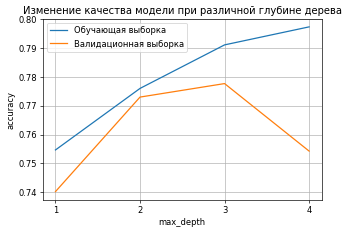

In [25]:
x = [1, 2, 3, 4]
plt.plot(x, accuracy_arr_tr, label="Обучающая выборка")
plt.plot(x, accuracy_arr_val, label="Валидационная выборка")

plt.legend(loc="upper left")
plt.xlabel('max_depth') 
plt.ylabel('accuracy') 
plt.title("Изменение качества модели при различной глубине дерева")
plt.xticks([1, 2, 3, 4])

plt.gcf().set_dpi(60)
plt.grid()

From the plots obtained, the overfitting of the constructed model is evident, since the quality is better with the training set than with the validation one.

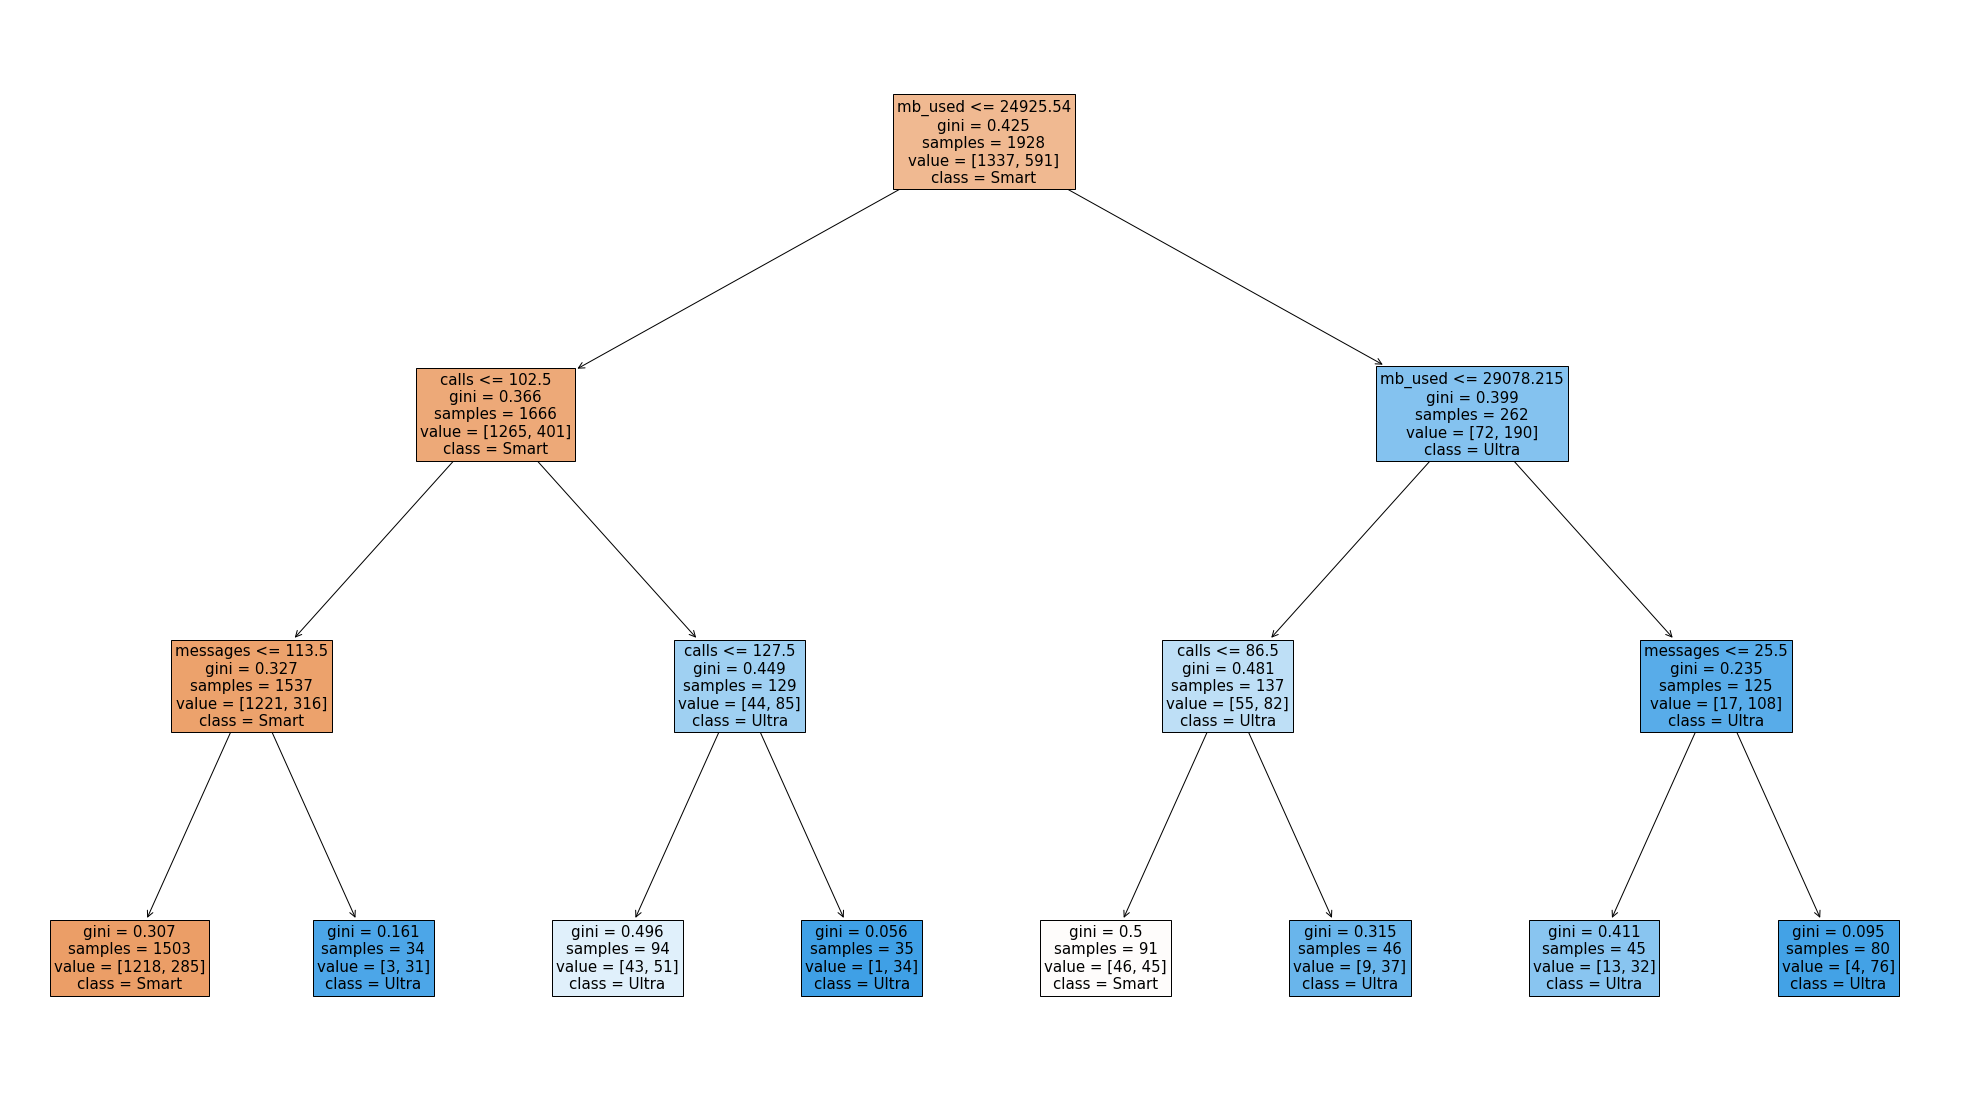

In [27]:
model = DecisionTreeClassifier(random_state=12345, max_depth=3)
#tree.plot_tree(model.fit(features_train, target_train))
#plt.rcParams["figure.figsize"] = (10, 10)
model.fit(features_train, target_train)
fig = plt.figure(figsize=(35,20))
_ = tree.plot_tree(model, 
               feature_names=features_train.columns.values, 
               class_names=['Smart','Ultra'],
               filled=True,
               fontsize = 15)

The next step is to train the random forest model and check the quality of the model with different number of trees (n_estimators).

In [197]:
%%time
best_model = None
best_result = 0
best_est = 10
for est in range(10, 100, 10):
    model = RandomForestClassifier(random_state=12345, n_estimators=est)
    model.fit(features_train, target_train)
    result = model.score(features_valid, target_valid)
    if result > best_result:
        best_model = model
        best_result = result
        best_est = est

print("Accuracy наилучшей модели на валидационной выборке:", best_result)
print("n_estimators =", best_est)

Accuracy наилучшей модели на валидационной выборке: 0.8102643856920684
n_estimators = 60
CPU times: user 1.71 s, sys: 17 ms, total: 1.73 s
Wall time: 1.73 s


The next model is a logistic regression.

In [198]:
best_model = None
best_result = 0
best_iter = 100
for i in range(100, 1000, 100):
    model = LogisticRegression(random_state=12345, solver="lbfgs", max_iter=i)
    model.fit(features_train, target_train)
    result = model.score(features_valid, target_valid)
    if result > best_result:
        best_model = model
        best_result = result
        best_iter = i

print("Accuracy наилучшей модели на валидационной выборке:", best_result)
print("max_iter =", best_iter)

Accuracy наилучшей модели на валидационной выборке: 0.7387247278382582
max_iter = 100


We can see that the random forest model with 60 trees has the best quality on the validation set.

<a id="4"></a>
## Checking the quality of the model on a testing set
[Back to the top](#0)

Check the quality of the random forest model chosen earlier on a test sample.

In [199]:
model = RandomForestClassifier(random_state=12345, n_estimators=50)
model.fit(features_train, target_train)
result = model.score(features_test, target_test)
print("Accuracy наилучшей модели на тестовой выборке:", result)

Accuracy наилучшей модели на тестовой выборке: 0.8040435458786936


We obtain that the quality of the random forest model with 60 trees is slightly lower on the testing set than on the validation one.

<a id="5"></a>
## Checking models for adequacy
[Back to the top](#0)

It was shown earlier that the `is_ultra` column has unbalanced classes (the number of zeros noticeably exceeds the number of ones), so let's build a primitive model when the predicted values are all zeros and find its quality on the test data.

In [200]:
dummy = DummyClassifier(strategy='most_frequent').fit(features_train, target_train)
dummy_pred = dummy.predict(features_test)
print('Уникальные прогнозируемые величины по примитивной модели: ', (np.unique(dummy_pred)))
print('Accuracy примитивной модели на тестовой выборке: ', accuracy_score(target_test, dummy_pred))

Уникальные прогнозируемые величины по примитивной модели:  [0]
Accuracy примитивной модели на тестовой выборке:  0.6936236391912908


We see that the quality of the primitive model is significantly lower than the previously constructed models, so we can conclude that the random tree, random forest and logistic regression models are adequate.